In [7]:
! pip install ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [8]:
import ipytest
ipytest.autoconfig()

from pprint import pprint

# Házifeladat

In [9]:
import time
import numpy as np

# import sys
# sys.setrecursionlimit(10000)

In [10]:
def site_percolation(edges, n):
    p = np.random.random(n)[np.asarray(edges)].max(axis=1)
    order = np.argsort(p)
    for i in order:
        yield p[i], edges[i]


def edge_percolation(edges, n=None):
    p = np.random.random(len(edges))
    order = np.argsort(p)
    for i in order:
        yield p[i], edges[i]

In [3]:
def rectangle(m, n):
    vertices = [(i, j) for i in range(m) for j in range(n)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        if i > 0:
            yield i-1, j
        if j > 0:
            yield i, j-1

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def rectangle8(m, n):
    vertices = [(i, j) for i in range(m) for j in range(n)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        for j0 in range(j-1, j+2):
            if (i-1, j0) in mapping:
                yield i-1, j0
        if j>0:
            yield i, j-1

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def triangle(m, n):
    vertices = [(i,j+i%2) for i in range(m) for j in range(0, n, 2)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        if i > 0:
            if j > 0:
                yield i-1, j-1
            if j+1 < n:
                yield i-1, j+1
        if j > 1:
            yield i, j-2

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

def hexagon(m, n):
    shift = [1, 0, 0, 1]
    vertices = [(i, j+shift[i%4]) for i in range(m) for j in range(0, n, 2)]
    mapping = {v: idx for  idx, v in enumerate(vertices)}

    def neighbors(v):
        i, j = v
        for j0 in range(j-1, j+2):
            if (i-1, j0) in mapping:
                yield i-1, j0

    edges = [(idx, mapping[v1]) for idx, v0 in enumerate(vertices) for v1 in neighbors(v0)]
    return vertices, edges

In [4]:
class UnionFind:

    def __init__(self, n):
        self.roots = [*range(n)]
        self.sizes = [1]*n
        self.max_size = 1

    def find(self, a):
        if self.roots[a]!=a:
            self.roots[a] = self.find(self.roots[a])
        return self.roots[a]


    def union(self, a, b):
        ra = self.find(a)
        rb = self.find(b)
        if ra != rb:
            if self.sizes[ra] > self.sizes[rb]:
                ra, rb = rb, ra
            self.roots[ra] = rb
            self.sizes[rb] += self.sizes[ra]
            if self.max_size < self.sizes[rb]:
                self.max_size = self.sizes[rb]
        return self.sizes[rb]


def max_comp_sizes(edge_iter, n):
    uf = UnionFind(n)
    for p, (a, b) in edge_iter:
        size = uf.union(a, b)
        yield p, uf.max_size


def discretize(mon_iter, subdivision, default=1):
    it = iter(subdivision)
    value = default
    t = next(it)
    for s, v in mon_iter:
        if s < t:
            value = v
        else:
            yield value
            t = next(it)
            value = v
    for _ in it:
        yield value
    yield value


# some test

In [5]:
vertices, edges = rectangle(4, 3)
print(f"{vertices=}\n{edges=}")

vertices=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
edges=[(1, 0), (2, 1), (3, 0), (4, 1), (4, 3), (5, 2), (5, 4), (6, 3), (7, 4), (7, 6), (8, 5), (8, 7), (9, 6), (10, 7), (10, 9), (11, 8), (11, 10)]


In [11]:
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")

edge percolation
(0.014159949884687273, (4, 3))
(0.037955344065935814, (5, 2))
(0.08805812365570065, (8, 5))
(0.09599667923379118, (6, 3))
(0.18105100485554482, (10, 9))
(0.2820195955357273, (2, 1))
(0.3091711059897633, (11, 8))
(0.4123354537928221, (4, 1))
(0.475908009889326, (7, 4))
(0.49696567001131664, (1, 0))
(0.5645511190811318, (8, 7))
(0.5919486035862214, (9, 6))
(0.6156706947927498, (3, 0))
(0.7324343221398918, (7, 6))
(0.8845949604448161, (10, 7))
(0.8904611682335886, (11, 10))
(0.9074591363835642, (5, 4))


In [12]:
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")

site percolation
(0.36076393740735935, (11, 10))
(0.36076393740735935, (11, 8))
(0.4052618678142482, (10, 9))
(0.4052618678142482, (9, 6))
(0.4350421507356864, (10, 7))
(0.4350421507356864, (8, 7))
(0.4350421507356864, (7, 6))
(0.4350421507356864, (7, 4))
(0.8131114217599525, (4, 1))
(0.8131114217599525, (2, 1))
(0.8146018077946943, (4, 3))
(0.8146018077946943, (6, 3))
(0.8287233759146021, (5, 4))
(0.8287233759146021, (5, 2))
(0.8287233759146021, (8, 5))
(0.9011195181669145, (3, 0))
(0.9011195181669145, (1, 0))


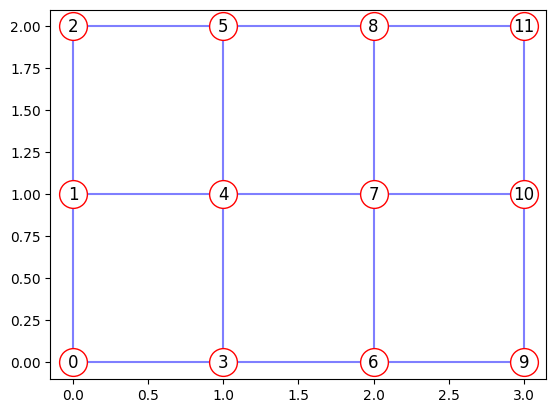

In [13]:
# import matplotlib
# matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph(vertices, edges):
    x, y = zip(*vertices)
    for a, b in edges:
        x0, y0 = vertices[a]
        x1, y1 = vertices[b]
        plt.plot((x0,x1), (y0,y1), c="blue", alpha=0.5)
    plt.plot(x, y, "o", mfc="white", mec="red", markersize=20, alpha=1)
    for i, (x, y) in enumerate(vertices):
        plt.text(x, y, str(i), fontsize=12, ha="center", va="center")
    plt.show()

plot_graph(*rectangle(4, 3))


In [14]:
vertices, edges = rectangle8(4, 3)
print(f"{vertices=}\n{edges=}")

vertices=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
edges=[(1, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (4, 2), (4, 3), (5, 1), (5, 2), (5, 4), (6, 3), (6, 4), (7, 3), (7, 4), (7, 5), (7, 6), (8, 4), (8, 5), (8, 7), (9, 6), (9, 7), (10, 6), (10, 7), (10, 8), (10, 9), (11, 7), (11, 8), (11, 10)]


In [15]:

print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")


edge percolation
(0.024345407266084362, (6, 3))
(0.028659115812676106, (4, 3))
(0.0563860947005711, (11, 7))
(0.06590199147503306, (4, 1))
(0.10926009259224301, (4, 0))
(0.12504745417040064, (11, 8))
(0.13760440640282945, (8, 7))
(0.14294566100953665, (10, 8))
(0.2310700523050645, (10, 7))
(0.27339906624542587, (11, 10))
(0.3241200663662056, (5, 2))
(0.3724339920805514, (7, 6))
(0.38737242397685867, (1, 0))
(0.4293024303674734, (4, 2))
(0.4311953296409551, (9, 7))
(0.4522244381236493, (8, 5))
(0.4608846947285128, (10, 9))
(0.49008966759168615, (3, 0))
(0.5307604584404815, (8, 4))
(0.58787820812602, (10, 6))
(0.6455590626336191, (2, 1))
(0.6926383457048013, (5, 4))
(0.8247774817598572, (3, 1))
(0.830334520432995, (6, 4))
(0.8334941616108192, (5, 1))
(0.8694815567442844, (7, 4))
(0.8763474930676897, (9, 6))
(0.9819381767171617, (7, 5))
(0.9957800248183222, (7, 3))


In [ ]:

print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


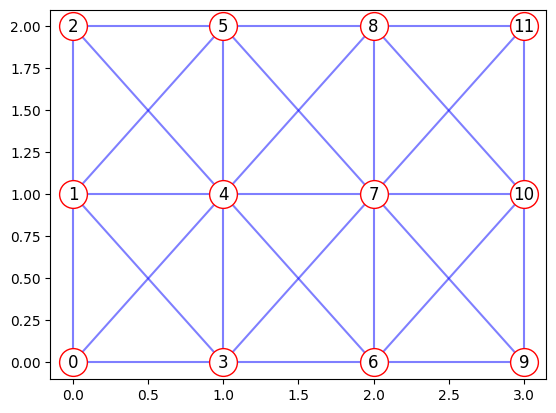

In [16]:
plot_graph(*rectangle8(4, 3))


In [ ]:
vertices, edges = triangle(4, 6)
print(f"{vertices=}\n{edges=}")

In [ ]:
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")

In [ ]:
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")


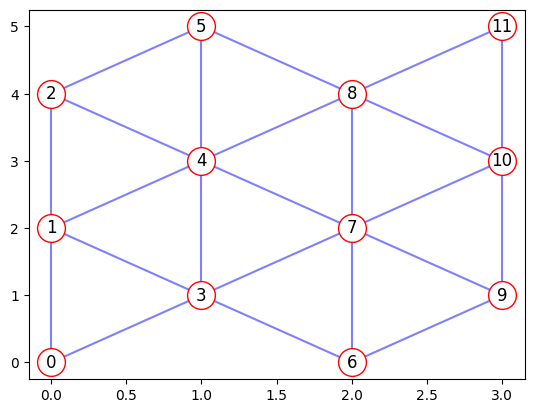

In [17]:
plot_graph(*triangle(4, 6))

In [ ]:
vertices, edges = hexagon(4, 4)
print(f"{vertices=}\n{edges=}")

In [ ]:
print("edge percolation")
print(*edge_percolation(edges, len(vertices)), sep="\n")

In [ ]:
print("site percolation")
print(*site_percolation(edges, len(vertices)), sep="\n")

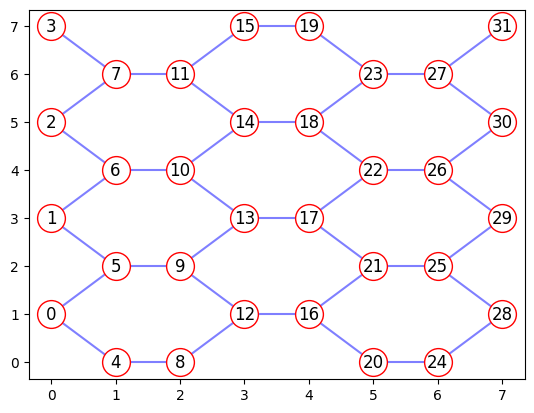

In [18]:
plot_graph(*hexagon(8, 8))

# site percolation

In [19]:
def experiment(n, percolation_fun):
    vertices, edges = rectangle(n, n)
    probs = []
    sizes = []
    for p, size in max_comp_sizes(percolation_fun(edges, len(vertices)), len(vertices)):
        probs.append(p)
        sizes.append(size)
    return probs, sizes


In [20]:
def percolation_max_size(vertices, edges, p_seq, percolation_fun=site_percolation, n_repeat=10):
    # p_seq = np.linspace(0, 1, 1001)
    comp_size = np.zeros_like(p_seq)
    for _ in range(n_repeat):
        sizes = [
            *discretize(
                max_comp_sizes(
                    percolation_fun(edges, len(vertices)),
                    len(vertices)
                ), p_seq)
        ]
        comp_size += sizes
    return comp_size/(len(vertices)*n_repeat)


In [21]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*rectangle(300, 300), p_seq, n_repeat=10)


CPU times: user 5.49 s, sys: 58.9 ms, total: 5.55 s
Wall time: 5.55 s


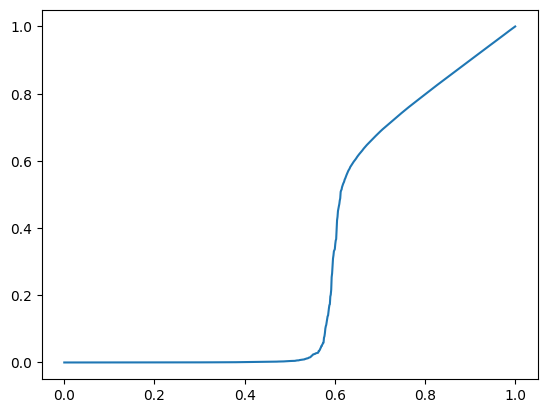

In [22]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [23]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*rectangle8(300, 300), p_seq, n_repeat=10)


CPU times: user 10.7 s, sys: 107 ms, total: 10.8 s
Wall time: 10.9 s


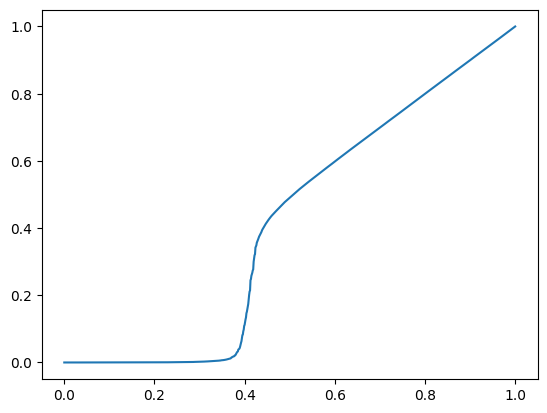

In [24]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [25]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*triangle(300, 300), p_seq, n_repeat=10)


CPU times: user 3.71 s, sys: 34.7 ms, total: 3.74 s
Wall time: 3.74 s


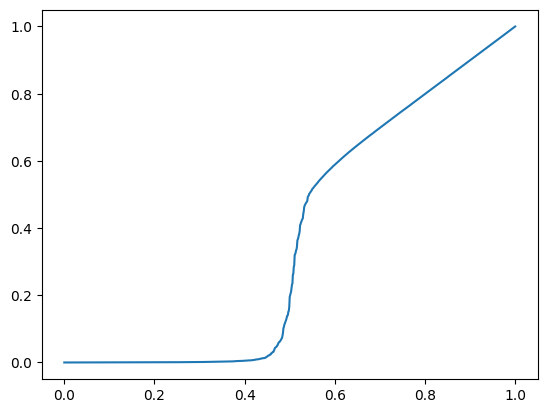

In [26]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [27]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*hexagon(300, 300), p_seq, n_repeat=10)


CPU times: user 2.09 s, sys: 11.6 ms, total: 2.1 s
Wall time: 2.11 s


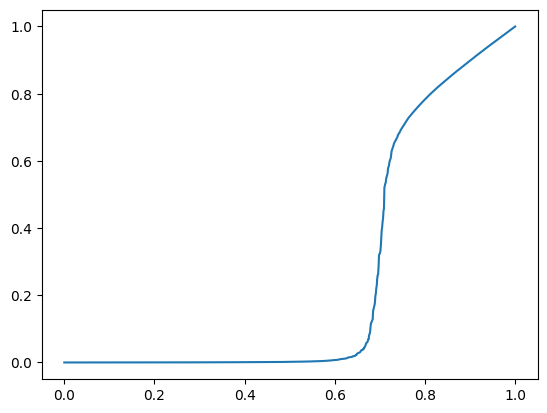

In [28]:
plt.plot(p_seq, rel_comp_size)
plt.show()

# edge percolation

In [29]:
%%time
p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*rectangle(300, 300), p_seq, percolation_fun=edge_percolation, n_repeat=10)

CPU times: user 6.32 s, sys: 16.4 ms, total: 6.34 s
Wall time: 6.4 s


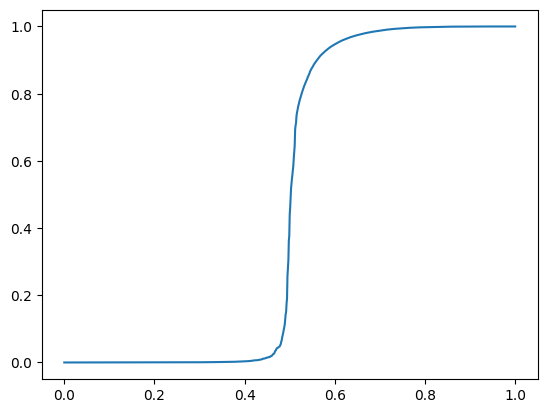

In [30]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [31]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*rectangle8(300, 300), p_seq, percolation_fun=edge_percolation, n_repeat=10)


CPU times: user 9.78 s, sys: 33.6 ms, total: 9.81 s
Wall time: 9.82 s


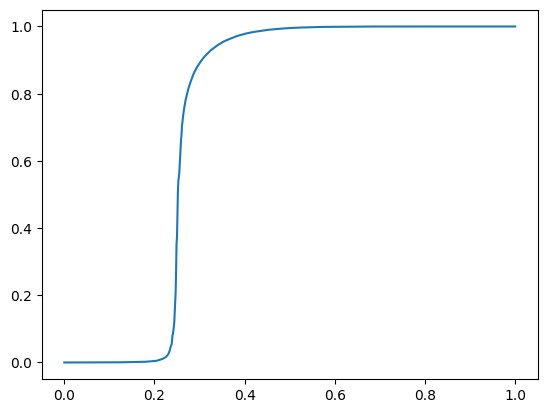

In [32]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [33]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*triangle(300, 300), p_seq, percolation_fun=edge_percolation, n_repeat=10)


CPU times: user 3.58 s, sys: 9.98 ms, total: 3.59 s
Wall time: 3.59 s


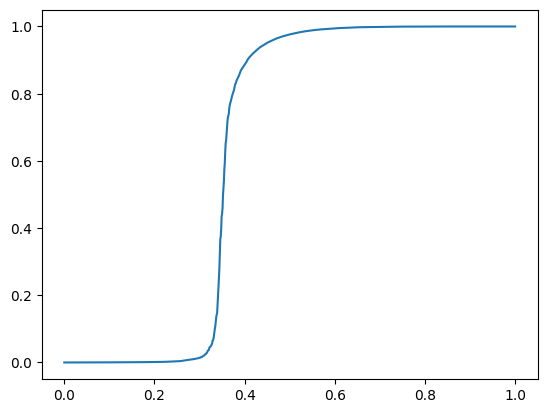

In [34]:
plt.plot(p_seq, rel_comp_size)
plt.show()

In [35]:
%%time

p_seq = np.linspace(0, 1, 1001)
rel_comp_size = percolation_max_size(*hexagon(300, 300), p_seq, percolation_fun=edge_percolation, n_repeat=10)


CPU times: user 1.96 s, sys: 1.48 ms, total: 1.96 s
Wall time: 1.96 s


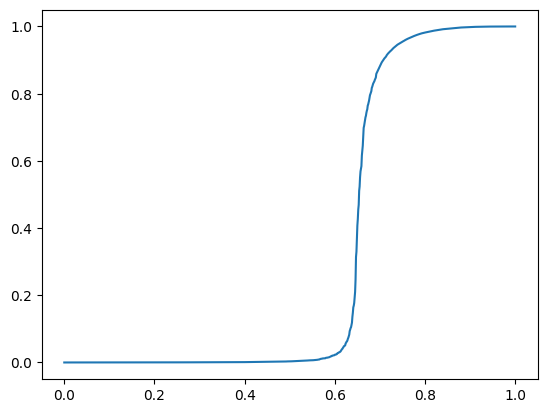

In [36]:
plt.plot(p_seq, rel_comp_size)
plt.show()

# Feladat: Leghosszabb növekvő részsorozat

Adott $a_1,a_2,\dots, a_n$. Keressük meg a leghosszabb növekvő részsorozat **hosszát**!

In [45]:
import itertools
import bisect

def longest_increasing_subsequence(nums):
    n = len(nums)
    for k in reversed(range(1, n+1)):
        for p in itertools.combinations(range(n), k):
            if all(nums[j] > nums[i] for i, j in itertools.pairwise(p)):
                return k
    return 1

def lis2(nums):
    stack = []
    for num in nums:
        i = bisect.bisect_left(stack, num)
        if i == len(stack):
            stack.append(num)
        else:
            stack[i] = num
    return len(stack)

def bisect_left(nums, num):
    lo = 0
    hi = len(nums)
    while lo < hi:
        mid = (lo + hi) // 2
        if nums[mid] < num:
            lo = mid + 1
        else:
            hi = mid
    return lo

lis = longest_increasing_subsequence
lis = lis2


In [46]:
%%ipytest

def test_lis():
    assert lis([3, 4, -1, 0, 6, 2, 3]) == 4
    assert lis([10, 9, 2, 5, 3, 7, 101, 18]) == 4
    assert lis([0, 1, 0, 3, 2, 3]) == 4
    assert lis([7, 7, 7, 7, 7, 7, 7]) == 1
    assert lis([1, 3, 6, 7, 9, 4, 10, 5, 6]) == 6

.                                                                                            [100%]
1 passed in 0.01s


# Sudoku

## Sudoku tábla `Matplotlib`-bel

A cél sudoku solver megírása. Ma csak megjelenítéssel és feladványok beolvasásával foglakozunk.

Ez egy [project Euler](https://projecteuler.net/problem=96) feladat. A teszt adatok is onnan vannak:

https://projecteuler.net/project/resources/p096_sudoku.txt

In [47]:
grid = [[f"{col}{row}" for col in "ABCDEFGHI"] for row in range(9)]
grid

[['A0', 'B0', 'C0', 'D0', 'E0', 'F0', 'G0', 'H0', 'I0'],
 ['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
 ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
 ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
 ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
 ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6'],
 ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7'],
 ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8']]

In [48]:
import uuid

class HTMLGrid:
    css = """
        .sudoku-board, .sudoku-board .box, .sudoku-board .box div {
            box-sizing: border-box;
        }

        .sudoku-board, .sudoku-board .box{
            display: flex;
            flex-wrap: wrap;
        }

        .sudoku-board .box {
           border: solid 1px;
           width: 152px;
        }

        .sudoku-board .box > div {
            border: solid 1px;
            width: 50px;
            text-align: center;
        }

        .sudoku-board .box > div:before {
            display: inline-block;
            padding-top: 100%;
            content: '';
            vertical-align: middle;
        }

        .sudoku-board .box .clue {
            background-color: LightGray;
            font-weight: bold;
        }

        .sudoku-board {
            width: 460px;
            margin: 0px;
            font-size: calc(0.8vw + 10px);
            border: solid 2px;
        }

        .sudoku-board .box div {
            color: gray;
            text-shadow: 1px 1px 1px white;
            vertical-align: middle;
        }
    """

    def __init__(self, transform=None):
        self.transform = self._transform if transform is None else transform

    @staticmethod
    def _transform(val):
        if isinstance(val, str):
            return "", val
        if val < 0:
            return 'class="solved"', -val
        elif val == 0:
            return "", ""
        else:
            return 'class="clue"', val

    def box(self, content):
        inner = "".join(f"<div {div_class}>{val}</div>" for div_class, val in content)
        return f'<div class="box">{inner}</div>\n'

    def board(self, boxes):
        inner = "".join(self.box(box) for box in boxes)
        return f'<div class="sudoku-board">\n{inner}</div>\n'

    def __call__(self, grid, title=""):
        boxes = [[0]*9 for _ in range(9)]
        for i, line in enumerate(grid):
          a, ra = divmod(i, 3)
          for j, val in enumerate(line):
            b, rb = divmod(j, 3)
            boxes[a*3+b][ra*3+rb] = self.transform(val)
        header = f"<h3>{title}</h3>" if title else ""
        html = f"<html>\n<head>\n<style>\n{self.css}\n</style>\n</head>\n<body>\n{header}\n{self.board(boxes)}</body></html>"
        html = html.replace('sudoku-board', f'sudoku-board-{uuid.uuid1()!s}')
        return html


Ellenőrzés EXCEL oszlop-sor jelöléssel

In [49]:
from IPython.display import display_html

In [50]:
html_grid = HTMLGrid()
grid = [[f'{j}{i}' for j in "ABCDEFGHI"] for i in range(9)]
html = html_grid(grid, "Grid")
print(html)


<html>
<head>
<style>

        .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c, .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box, .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box div {
            box-sizing: border-box;
        }

        .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c, .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box{
            display: flex;
            flex-wrap: wrap;
        }

        .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box {
           border: solid 1px;
           width: 152px;
        }

        .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box > div {
            border: solid 1px;
            width: 50px;
            text-align: center;
        }

        .sudoku-board-3b813ece-acca-11ef-bf0c-0242ac1c000c .box > div:before {
            display: inline-block;
            padding-top: 100%;
            content: '';
            vertical-align: middle;
        }

        .sudoku-board-3b813ece-acca-11ef-bf0c-0

In [51]:

display_html(html, raw=True)


Grid 
 
 A0 B0 C0 A1 B1 C1 A2 B2 C2 
 D0 E0 F0 D1 E1 F1 D2 E2 F2 
 G0 H0 I0 G1 H1 I1 G2 H2 I2 
 A3 B3 C3 A4 B4 C4 A5 B5 C5 
 D3 E3 F3 D4 E4 F4 D5 E5 F5 
 G3 H3 I3 G4 H4 I4 G5 H5 I5 
 A6 B6 C6 A7 B7 C7 A8 B8 C8 
 D6 E6 F6 D7 E7 F7 D8 E8 F8 
 G6 H6 I6 G7 H7 I7 G8 H8 I8

In [52]:

grid=[
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 3],
    [0, 7, 4, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 0, 2],
    [0, 8, 0, 0, 4, 0, 0, 1, 0],
    [6, 0, 0, 5, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 7, 8, 0],
    [5, 0, 0, 0, 0, 9, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 0]
    ]

html = html_grid(grid, "Hard problem")
# print(html)
display_html(html, raw=True)


Hard problem 
 
 2 7 4 
 6 8 
 3 
 8 6 
 3 4 5 
 2 1 
 5 
 1 9 
 7 8 4

In [57]:

from IPython.core.pylabtools import print_figure
import matplotlib.pyplot as plt
from IPython.display import Image, SVG

In [55]:


def figure_data(grid, title="", format="svg"):
    size = len(grid)
    fig = plt.figure(
        figsize=(4, 4),
        layout="compressed",
        )

    ax = fig.add_subplot(
        1, 1, 1,
        aspect="equal",
        xmargin=0.01,
        ymargin=0.01
    )

    ax.axis("off")
    ax.set_title(title, loc="left", fontdict={"weight": "bold"})

    for x, row in enumerate(reversed(grid)):
        for y, value in enumerate(row):
            ax.text(
                y+0.5, x+0.5,
                value,
                ha='center',
                va='center',
                fontsize=12,
                color="gray"
            )

    for x in range(size+1):
        linewidth = 1
        if x % 3 == 0:
            linewidth = 2
        ax.plot((0, size), (x, x), color="black", linewidth=linewidth)
        ax.plot((x, x), (0, size), color="black", linewidth=linewidth)

    data = print_figure(fig, format)
    plt.close(fig)
    return data


In [58]:
print(figure_data(grid, "Sudoku grid", "png"))

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x85\x00\x00\x01\x9b\x08\x06\x00\x00\x00+\xff\x8c\xa3\x00\x00\x009tEXtSoftware\x00Matplotlib version3.8.0, https://matplotlib.org/5\xb1\xb5\xab\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00;\xdfIDATx\x9c\xed\xdd\x7fTT\xf7\x9d\xff\xf1\xd7\x0c\xc3\xa0\x08\x8eB\x98Q\x07\x82\x15\x7f\r\x8a\x06\xa7\x01c\x8c\x11\x89\x93\xe14k\xcav\x13\x8f\xd1\x04\x1b\xb7=\xa7\xe9f\x8f\xd9\x9en\xcf\xd9\x93m\xb2\xdd\x7fv\xf7\x9b\xed\x9el7\xdd\xedn\xbb\xa6g\x8dI\xb7I\x1b\x93\xb6zB\xf8\x11\xcd\x0f\xd6\x00\xe1W h\x93(\x05% \x06\x1cq\x98a\x98\xfb\xfd\xc33\x1f\x9d\x0c\x1ag\x06\xf9\xbci^\x8fs<\xe0\x9d\x19x\xfa\xb9\to\xee\\\x98k2\x0c\xc3\x00\x11\x11\x11\x00\xb3\xee\x00""\x92\x83C\x81\x88\x88\x14\x0e\x05""R8\x14\x88\x88H\xe1P ""\x85C\x81\x88\x88\x14\x0e\x05""R8\x14\x88\x88H\xe1P ""eF\x0c\x85\xdd\xbbw\xc3d2\xc1d2\xa1\xbe\xbe>\xa1\x8f\xf1\xe4\x93O\xaa\x8f\xf1\xec\xb3\xcfNi\xdftY\xbcx\xb1\xfa7\\\x8f\xc8}\x17/^|c\xc3\x88\xe8\x8fF\xdcC\xa1\xb7\xb7\x17\xdf\

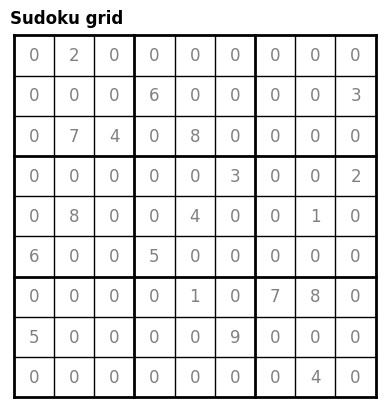

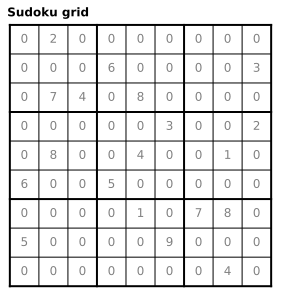

In [59]:
display(Image(figure_data(grid, "Sudoku grid", "png")))
SVG(figure_data(grid, "Sudoku grid", "svg"))

In [61]:
def char_value(x):
    return int(x) if x.isdigit() else 0

class Sudoku:
    html_grid = HTMLGrid()

    def __init__(self, grid, name=None):
        self.grid = grid
        self.name = name if name is not None else "Unnamed Sudoku"
        self._svg_data = None

    @classmethod
    def from_str(cls, grid, name):
        grid = [[char_value(x) for x in line.strip()] for line in grid]
        return cls(grid, name)

    def enumerate(self):
        grid = self.grid
        for row, line in enumerate(grid, 1):
            for col, value in enumerate(line, 1):
                if value != 0:
                    yield row, col, value

    def copy(self):
        grid = [line.copy() for line in self.grid]
        return type(self)(grid, self.name)

    def as_symbols(self, symbols=" 𝟭𝟮𝟯𝟰𝟱𝟲𝟳𝟴𝟵", neg_symbols=" 123456789"):
        return [
            [symbols[abs(x)] if x>=0 else neg_symbols[abs(x)]  for x in line]
            for line in self.grid
            ]

    def txt(self):
        return '\n'.join(map(' '.join, self.as_symbols("_𝟭𝟮𝟯𝟰𝟱𝟲𝟳𝟴𝟵", "_123456789")))

    def __str__(self):
        return f'{self.name}:\n{self.txt()}'

    def _repr_html_(self):
        return self.html_grid(self.grid, self.name)

    def _repr_svg_(self):
        return self.svg

    @property
    def svg(self):
        if self._svg_data is None:
            fig = self.draw()
            self._svg_data = print_figure(fig, fmt="svg")
        return self._svg_data

    def draw(self, **kwargs):
        grid = self.grid
        size = len(grid)
        ax = plt.subplot(1, 1, 1, aspect="equal")
        ax.axis("off")
        ax.set_title(self.name, loc="left", fontdict={"weight": "bold"})

        text_args = {
            'fontsize': "12",
            'color': "gray",
            'ha': 'center',
            'va': 'center'
            }
        text_args.update(kwargs)
        for row, col, value in self.enumerate():
            row = size-row+1
            if value > 0:
                ax.fill([col-1, col, col, col-1], [row-1, row-1, row, row], color="lightgray", alpha=0.5)

            ax.text(
                col-0.5, row-0.5,
                abs(value),
                **text_args,
                fontweight= "bold" if value > 0 else 'normal'
            )

        for x in range(size+1):
            linewidth = 1
            if x % 3 == 0:
                linewidth = 2
            ax.plot((0, size), (x, x), color="black", linewidth=linewidth)
            ax.plot((x, x), (0, size), color="black", linewidth=linewidth)

        plt.close(ax.figure)

        return ax.figure


### Egy nehéz sudoku

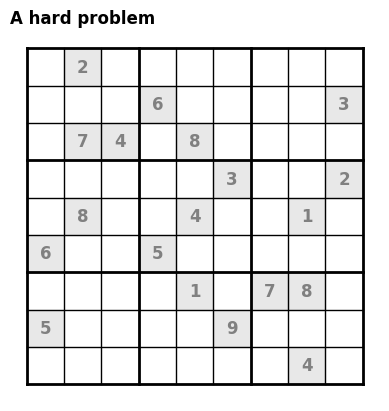

In [62]:
grid=[
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 3],
    [0, 7, 4, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 0, 2],
    [0, 8, 0, 0, 4, 0, 0, 1, 0],
    [6, 0, 0, 5, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 7, 8, 0],
    [5, 0, 0, 0, 0, 9, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 0]
    ]
sudoku = Sudoku(grid, "A hard problem")

sudoku.draw()

A hard problem:
_ 𝟮 _ _ _ _ _ _ _
_ _ _ 𝟲 _ _ _ _ 𝟯
_ 𝟳 𝟰 _ 𝟴 _ _ _ _
_ _ _ _ _ 𝟯 _ _ 𝟮
_ 𝟴 _ _ 𝟰 _ _ 𝟭 _
𝟲 _ _ 𝟱 _ _ _ _ _
_ _ _ _ 𝟭 _ 𝟳 𝟴 _
𝟱 _ _ _ _ 𝟵 _ _ _
_ _ _ _ _ _ _ 𝟰 _


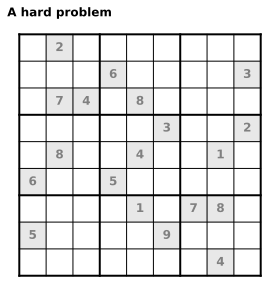

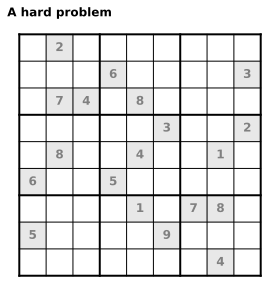

In [63]:
print(sudoku)
display(sudoku)
display(SVG(sudoku.svg))


In [64]:
list(sudoku.enumerate())

[(1, 2, 2),
 (2, 4, 6),
 (2, 9, 3),
 (3, 2, 7),
 (3, 3, 4),
 (3, 5, 8),
 (4, 6, 3),
 (4, 9, 2),
 (5, 2, 8),
 (5, 5, 4),
 (5, 8, 1),
 (6, 1, 6),
 (6, 4, 5),
 (7, 5, 1),
 (7, 7, 7),
 (7, 8, 8),
 (8, 1, 5),
 (8, 6, 9),
 (9, 8, 4)]

## Hogyan fogalmazható meg a feladat a matek eszközeivel?

Adottak követelmények (`Item`) és opciók (`Option`). A feladat az opciók egy részének kiválasztása úgy, hogy az összes követelmény teljesüljön.

Egy lehetséges formalizálás, $x_1,\dots, x_m$ logikai változók, egy
$c=c(x_1,\dots,x_n)$ logikai kifejezés.

A kérdés ezután az, hogy az $x_i$ értékek (Igaz/Hamis) milyen választása mellett lesz a $c$ logikai kifejezés értéke igaz.

Minden logikai kifejezés felírható $\wedge$ (és) $\vee$ (vagy) és $\neg$ (tagadás) segítségével.

pl.
$$
    x_1\Rightarrow x_2,\quad \neg x_1\vee x_2
$$

A logikai kifejezés $c$ megadható olyan alakban is, ahol
$$
    c(x_1,\dots, x_m) = \large\wedge_i c_i(x_1,\dots,x_m)\quad
    c_i(x_1,\dots,x_m) = (\vee_{j\in S_i} x_j) \vee (\vee_{j\in S'_i} \neg x_j),\quad S,S'\subset\{1,\dots, m\}
$$

$c_i$ megadható $S$ és $S'$ segítségével. Ha $S_i\cap S'_i\neq \emptyset$ akkor $c_i$ mindig igaz, ezért $c$-ből elhagyható. Ha a váltózók indexelése 1-től indul, akkor egy kényelmes kódolása $c_i$-nek
az indexek előjeles listája:
$$
    \{j:j \in S_i\}\cup\{-j:j\in S'_i\}
$$


## Sudoku tábla

In [65]:
class Option(int):
    max_value = 9*9*9

    def __init__(self, val):
        if not (1 <= abs(val) <= self.max_value):
            raise ValueError(f"Absolute value must be in [1, {self.max_value}]. Obtained {val}")

    def apply(self, grid):
        row, col, val = self.to_triple()
        row, col = row-1, col-1
        if grid[row][col] != 0 and abs(grid[row][col]) != val:
            raise ValueError("Grid cell at {row+1}, {col+1} is not empty!")
        if grid[row][col] == 0:
            grid[row][col] = val

    @classmethod
    def from_triple(cls, row, col, val):
        if not (1<= row <= 9 and 1<= col <= 9 and 1<= val <= 9):
            raise ValueError(
                "Invalid triple. "
                "All numbers must be in [1, 9]. "
                f"Obtained {row=}, {col=}, {val=}"
                )
        return cls((row-1)*81+(col-1)*9+val-1 + 1)

    @classmethod
    def instances(cls):
        for i in range(1, cls.max_value+1):
            yield cls(i)

    def to_triple(self):
        n = abs(self)-1
        n, val = divmod(n, 9)
        row, col = divmod(n, 9)
        row, col, val = row+1, col+1, val+1
        return row, col, val

    def __neg__(self):
        return Option(-int(self))

    def __str__(self):
        row, col, val = self.to_triple()
        prefix = 'not ' if self < 0 else ''
        return f"{prefix}{val}@({row}, {col})"

    def __repr__(self):
        return f"{type(self).__name__}({self!s}, code={self:d})"

    def items(self):
        row, col, val = self.to_triple()
        yield Item.not_empty(row, col)
        yield Item.row_contains(row, val)
        yield Item.col_contains(col, val)
        yield Item.square_contains(row, col, val)


class Clause(list):
    def __str__(self):
        return ' or '. join(map(str, self))

In [66]:
%%ipytest
from pytest import raises

def test_option():
    for i in range(1, 10):
        for j in range(1, 10):
            for val in range(1,10):
                option = Option.from_triple(i, j, val)
                assert str(option) == f"{val}@({i}, {j})"
                assert option.to_triple() == (i, j, val)

def test_option_invalid():
    with raises(ValueError):
        option = Option.from_triple(10,9,9)

    with raises(ValueError):
        option = Option.from_triple(0,9,9)

    with raises(ValueError):
        option = Option.from_triple(1,10,9)

    with raises(ValueError):
        option = Option.from_triple(1,0,9)

    with raises(ValueError):
        option = Option.from_triple(1,9,19)

    with raises(ValueError):
        option = Option.from_triple(1,9,0)

def test_option_all():
    for i, o in enumerate(Option.instances(), 1):
        assert o == i
    assert i == Option.max_value



...                                                                                          [100%]
3 passed in 0.02s


In [68]:
-Option.from_triple(1,1,9)

Option(9@(1, 1), code=9)

In [69]:
def subsquare(i, j):
    x, y = 3*i+1, 3*j+1
    for row in range(x, x+3):
        for col in range(y, y+3):
            yield row, col

class Item(int):
    max_value = 4*9*9-1


    def __init__(self, value):
        if not (0 <= value <= self.max_value):
            raise ValueError(f"Value must be in [0, max_value]. Obtained {value}")

    @classmethod
    def from_triple(cls, item_type, a, b):
        if not (0 <= item_type < 4 and 0 <= a < 9 and 0 <= b < 9):
            raise ValueError(f"Invalid parameters: {item_type=}, {a=}, {b=}")
        return cls(item_type*81+a*9+b)

    @classmethod
    def not_empty(cls, row, col):
        return cls.from_triple(0, row-1, col-1)

    @classmethod
    def row_contains(cls, row, val):
        return cls.from_triple(1, row-1, val-1)

    @classmethod
    def col_contains(cls, col, val):
        return cls.from_triple(2, col-1, val-1)

    @classmethod
    def square_contains(cls, row, col, val):
        sq = 3*((row-1)//3) + ((col-1)//3)
        return cls.from_triple(3, sq, val-1)

    @classmethod
    def instances(cls):
        for i in range(cls.max_value+1):
            yield cls(i)

    def __str__(self):
        n = self
        item_type, n = divmod(n, 81)
        i, j = divmod(n, 9)
        match item_type:
            case 0:
                return f"cell{(i+1, j+1)} ¬∅"
            case 1:
                return f"∃{j+1} in row[{i+1}]"
            case 2:
                return f"∃{j+1} in col[{i+1}]"
            case 3:
                val = j+1
                i, j = divmod(i, 3)
                return f"∃{val} in square{(i+1, j+1)}"

    def __repr__(self):
        return f"{type(self).__name__}({self!s}, code={self:d})"

    def options(self):
        n = self
        item_type, n = divmod(n, 81)
        i, j = divmod(n, 9)
        match item_type:
            case 0:
                row, col = i+1, j+1
                for val in range(1, 10):
                    yield Option.from_triple(row, col, val)
            case 1:
                row = i+1
                val = j+1
                for col in range(1, 10):
                    yield Option.from_triple(row, col, val)
            case 2:
                val = j+1
                col = i+1
                for row in range(1, 10):
                    yield Option.from_triple(row, col, val)
            case 3:
                val = j+1
                i, j = divmod(i, 3)
                for row,col in subsquare(i, j):
                    yield Option.from_triple(row, col, val)

    def cnf(self):
        return Clause(self.options())


In [70]:

item = Item(81*3+45)
print(f"{item=}")
print(item.cnf())
pprint(set(item.options()))
print(f"{len(list(Item.instances()))=}")

item=Item(∃1 in square(2, 3), code=288)
1@(4, 7) or 1@(4, 8) or 1@(4, 9) or 1@(5, 7) or 1@(5, 8) or 1@(5, 9) or 1@(6, 7) or 1@(6, 8) or 1@(6, 9)
{Option(1@(4, 7), code=298),
 Option(1@(4, 8), code=307),
 Option(1@(4, 9), code=316),
 Option(1@(5, 7), code=379),
 Option(1@(5, 8), code=388),
 Option(1@(5, 9), code=397),
 Option(1@(6, 7), code=460),
 Option(1@(6, 8), code=469),
 Option(1@(6, 9), code=478)}
len(list(Item.instances()))=324


In [71]:
print(Clause([Option(1), Option(2), -Option(3)]))

1@(1, 1) or 2@(1, 1) or not 3@(1, 1)


In [72]:
option = Option(100)
print(f"{option=}")
pprint(list(option.items()))

option=Option(1@(2, 3), code=100)
[Item(cell(2, 3) ¬∅, code=11),
 Item(∃1 in row[2], code=90),
 Item(∃1 in col[3], code=180),
 Item(∃1 in square(1, 1), code=243)]


## Sudoku solver a `picosat` könyvtárral.

A következő kód a `picosat` solver `github` repositorijáról van:

https://pypi.org/project/pycosat/

https://github.com/conda/pycosat/blob/main/examples/sudoku.py

```python
"""
The implementation of this Sudoku solver is based on the paper:

    "A SAT-based Sudoku solver" by Tjark Weber

    https://www.lri.fr/~conchon/mpri/weber.pdf

If you want to understand the code below, in particular the function valid(),
which calculates the 324 clauses corresponding to 9 cells, you are strongly
encouraged to read the paper first.  The paper is very short, but contains
all necessary information.
"""
import pycosat


def v(i, j, d):
    """
    Return the number of the variable of cell i, j and digit d,
    which is an integer in the range of 1 to 729 (including).
    """
    return 81 * (i - 1) + 9 * (j - 1) + d


def sudoku_clauses():
    """
    Create the (11745) Sudoku clauses, and return them as a list.
    Note that these clauses are *independent* of the particular
    Sudoku puzzle at hand.
    """
    res = []
    # for all cells, ensure that the each cell:
    for i in range(1, 10):
        for j in range(1, 10):
            # denotes (at least) one of the 9 digits (1 clause)
            res.append([v(i, j, d) for d in range(1, 10)])
            # does not denote two different digits at once (36 clauses)
            for d in range(1, 10):
                for dp in range(d + 1, 10):
                    res.append([-v(i, j, d), -v(i, j, dp)])

    def valid(cells):
        # Append 324 clauses, corresponding to 9 cells, to the result.
        # The 9 cells are represented by a list tuples.  The new clauses
        # ensure that the cells contain distinct values.
        for i, xi in enumerate(cells):
            for j, xj in enumerate(cells):
                if i < j:
                    for d in range(1, 10):
                        res.append([-v(xi[0], xi[1], d), -v(xj[0], xj[1], d)])

    # ensure rows and columns have distinct values
    for i in range(1, 10):
        valid([(i, j) for j in range(1, 10)])
        valid([(j, i) for j in range(1, 10)])
    # ensure 3x3 sub-grids "regions" have distinct values
    for i in 1, 4, 7:
        for j in 1, 4 ,7:
            valid([(i + k % 3, j + k // 3) for k in range(9)])

    assert len(res) == 81 * (1 + 36) + 27 * 324
    return res


def solve(grid):
    """
    solve a Sudoku grid inplace
    """
    clauses = sudoku_clauses()
    for i in range(1, 10):
        for j in range(1, 10):
            d = grid[i - 1][j - 1]
            # For each digit already known, a clause (with one literal).
            # Note:
            #     We could also remove all variables for the known cells
            #     altogether (which would be more efficient).  However, for
            #     the sake of simplicity, we decided not to do that.
            if d:
                clauses.append([v(i, j, d)])

    # solve the SAT problem
    sol = set(pycosat.solve(clauses))

    def read_cell(i, j):
        # return the digit of cell i, j according to the solution
        for d in range(1, 10):
            if v(i, j, d) in sol:
                return d

    for i in range(1, 10):
        for j in range(1, 10):
            grid[i - 1][j - 1] = read_cell(i, j)


if __name__ == '__main__':
    from pprint import pprint

    # hard Sudoku problem, see Fig. 3 in paper by Weber
    hard = [[0, 2, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 6, 0, 0, 0, 0, 3],
            [0, 7, 4, 0, 8, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 3, 0, 0, 2],
            [0, 8, 0, 0, 4, 0, 0, 1, 0],
            [6, 0, 0, 5, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 7, 8, 0],
            [5, 0, 0, 0, 0, 9, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 4, 0]]
    solve(hard)
    pprint(hard)
    assert [[1, 2, 6, 4, 3, 7, 9, 5, 8],
            [8, 9, 5, 6, 2, 1, 4, 7, 3],
            [3, 7, 4, 9, 8, 5, 1, 2, 6],
            [4, 5, 7, 1, 9, 3, 8, 6, 2],
            [9, 8, 3, 2, 4, 6, 5, 1, 7],
            [6, 1, 2, 5, 7, 8, 3, 9, 4],
            [2, 6, 9, 3, 1, 4, 7, 8, 5],
            [5, 4, 8, 7, 6, 9, 2, 3, 1],
            [7, 3, 1, 8, 5, 2, 6, 4, 9]] == hard

```

In [79]:
! pip install pycosat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycosat: filename=pycosat-0.6.6-cp310-cp310-linux_x86_64.whl size=169340 sha256=4897652e67361cd68e85ab1cc6ee0ddb11162d86edc19e4b887ca6dfa1d5fa80
  Stored in directory: /root/.cache/pip/wheels/63/29/df/b8c22ca5812e2d7b342269a53add280b5bad42a540f34c3dc1
Successfully built pycosat


In [80]:
import pycosat
from itertools import product, combinations


In [81]:
def sudoku_clauses_naive():
    one_value_per_cell = [
        Clause((-Option.from_triple(row, col, val0), -Option.from_triple(row, col, val1)))
        for row, col, (val0, val1) in product(
            range(1, 10),
            range(1, 10),
            combinations(range(1, 10), 2)
        )
    ]

    return (
        [Item(i).cnf() for i in range(4*81)] +
        one_value_per_cell
    )

In [ ]:

def sudoku_clauses():
    one_value_per_cell = [
        Clause((-Option.from_triple(row, col, val0), -Option.from_triple(row, col, val1)))
        for row, col, (val0, val1) in product(
            range(1, 10),
            range(1, 10),
            combinations(range(1, 10), 2)
        )
    ]

    one_location_per_row = [
        Clause((-Option.from_triple(row, col0, val), -Option.from_triple(row, col1, val)))
        for row, (col0, col1), val in product(
            range(1, 10),
            combinations(range(1, 10), 2),
            range(1, 10),
        )
    ]

    one_location_per_col = [
        Clause((-Option.from_triple(row0, col, val), -Option.from_triple(row1, col, val)))
        for (row0, row1), col, val in product(
            combinations(range(1, 10), 2),
            range(1, 10),
            range(1, 10)
        )
    ]

    one_location_per_square = [
        Clause((-Option.from_triple(row0, col0, val), -Option.from_triple(row1, col1, val)))
        for i in range(9)
        for ((row0, col0), (row1, col1)), val in product(
            combinations(subsquare(i//3, i%3), 2),
            range(1, 10)
        )
    ]

    return (
        [Item(i).cnf() for i in range(4*81)] +
        one_value_per_cell +
        one_location_per_row +
        one_location_per_col +
        one_location_per_square
    )

In [ ]:
clauses = sudoku_clauses_naive()
print(f"naive: {len(clauses)=}\n{clauses[0]=!s}\n{clauses[-5]=!s}")
clauses = sudoku_clauses()
print(f"improved: {len(clauses)=}\n{clauses[0]=!s}\n{clauses[-5]=!s}")


In [82]:
def naive_solver(sudoku, **kwargs):
    """
    solve a Sudoku grid inplace
    """
    clauses = sudoku_clauses_naive()

    clauses.extend(
        Clause([Option.from_triple(row, col, val)])
        for row, col, val in sudoku.enumerate()
    )

    sudoku_solved = sudoku.copy()
    grid = sudoku_solved.grid
    for option in pycosat.solve(clauses, **kwargs):
        if option > 0:
            Option(option).apply(grid)
    sudoku_solved.name += " solved"
    return sudoku_solved

In [ ]:
def modified_solver(sudoku, **kwargs):
    """
    solve a Sudoku grid inplace
    """
    clauses = sudoku_clauses()

    clauses.extend(
        Clause([Option.from_triple(row, col, val)])
        for row, col, val in sudoku.enumerate()
    )

    sudoku_solved = sudoku.copy()
    grid = sudoku_solved.grid
    for option in pycosat.solve(clauses, **kwargs):
        if option > 0:
            Option(option).apply(grid)
    sudoku_solved.name += " solved"
    return sudoku_solved


In [ ]:
class PycosatSolver:
    naive_clauses = sudoku_clauses_naive()
    clauses = sudoku_clauses()
    def solve(self, sudoku, which="modified", **kwargs):
        clauses = self.clauses if which == "modified" else self.naive_clauses
        clauses = clauses.copy()
        clauses.extend(
            Clause([Option.from_triple(row, col, val)])
            for row, col, val in sudoku.enumerate()
        )
        sudoku_solved = sudoku.copy()
        grid = sudoku_solved.grid
        for option in pycosat.solve(clauses, **kwargs):
            if option > 0:
                Option(option).apply(grid)
        sudoku_solved.name += " solved"
        return sudoku_solved



In [83]:
%timeit sudoku_solved = naive_solver(sudoku)

1.22 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit sudoku_solved = modified_solver(sudoku)

In [ ]:
sudoku_solved = modified_solver(sudoku)
print(sudoku_solved)

In [ ]:
display(SVG(sudoku_solved.svg))

In [ ]:
sudoku_solved.draw()

## Egész értékű programozás

A sudoku feladat úgy is megfogalmazható, hogy adott egy mátrix $A$. $A_{i,j}=1$ ha az $j$. opció kielégíti a $i$. követelményt. A korábbi $x_1,\dots,x_m$ logikai változókat egy $x$ vektorba összefogva ($\text{Hamis}=0$ és $\text{Igaz}=1$)
$$
    v = Ax
$$
esetén $v_i$ azt adja meg, hogy a $i$. követelményt hány opció teljesíti a kiválasztottak közül. Azt szeretnénk, ha ez 1 lenne minden $i$-re.

Azaz a feladat
$$
    Ax = \mathbb{1}, \quad \text{úgy, hogy  $x_i\in\{0, 1\}$}
$$
Ha több megoldás van akkor vehetjük azt, ami minimalizál egy lineráris kifejezést.

## Lineáris programozás

A lineáris programozási feladat általános alakja:
$$
    x_0=\arg\max_x c^T x,\quad\text{úgy, hogy}\quad
    Ax \leq b, \quad x\geq0
$$
Azaz azt az $x_0$ vektort keressük, ami a $\sum_jc_jx_j$ összeget maximalizálja azon nem negatív koordinátájú $x$-ek között, amik a lineáris feltételnek $(Ax)_j\geq 0$ eleget tesznek.

A feladatban $A$, $c$ és $b$ adottak és $c$, $b$ **nem negatívak** (azaz a koordináták ilyenek).

Példa:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
c = np.array([1, 1])
b = np.array([2, 3])
A = np.array([[1, 2], [2, 1]])
print(f"{c=}, {b=},\n{A=!s}")

In [ ]:
def line(v, b):
    p0 = b/(v@v)*v
    v_perp = np.array([v[1], -v[0]])
    p1 = p0+v_perp
    return p0, p1

def y_fun(v, b):
    return lambda x: b/v[1]-(v[0]/v[1])*x

ax = plt.axes((0, 0, 1, 1))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_aspect("equal")
for v, b0 in zip(A, b):
    ax.axline(*line(v, b0))
ax.grid()
ax.plot([4/3], [1/3], 'or')
ax.axline((4/3, 1/3), (1/3, 4/3), color='red', alpha=0.5)


xs = np.linspace(-4, 4, 201)

ax.fill_between(xs, -4, np.minimum(y_fun(A[0], b[0])(xs), y_fun(A[1], b[1])(xs)), alpha=0.5)
plt.show()


## `scipy` mixed integer solver (`milp`).

In [ ]:
from scipy.optimize import milp, Bounds, LinearConstraint
import numpy as np

In [ ]:
help(milp)

In [ ]:
sudoku.draw()

In [ ]:
def sudoku_adj_matrix():
    options = list(Option.instances())

    A = np.zeros((Item.max_value+1, len(options)))
    for j, option in enumerate(options):
        for item in option.items():
            A[item][j] = 1
    return A, options


In [ ]:
A, options = sudoku_adj_matrix()
pprint(A)

In [ ]:

class MilpSolver():
    A, options = sudoku_adj_matrix()
    options_ub = np.ones_like(options)
    items_b = np.ones(A.shape[0])

    def solve(self, sudoku):
        lower_bound = np.zeros_like(self.options_ub)

        lower_bound[
            [Option.from_triple(row, col, val)-1 for row, col, val in sudoku.enumerate()]
            ] = 1
        bounds = Bounds(lower_bound, self.options_ub)
        constraints = LinearConstraint(self.A, self.items_b, self.items_b)
        solution = milp(
            self.options_ub, # all one vector, could be almost anything
            integrality=self.options_ub,
            bounds=bounds,
            constraints=constraints
            )
        sudoku_solved = sudoku.copy()
        sudoku_solved.name += " solved"
        for option, include in zip(self.options, solution.x):
            if include == 1:
                option.apply(sudoku_solved.grid)

        sudoku_solved.milp_solution = solution
        return sudoku_solved





In [ ]:
milp_solver = MilpSolver()
sudoku_solved = milp_solver.solve(sudoku)

In [ ]:
%timeit sudoku_solved = milp_solver.solve(sudoku)


In [ ]:
print(sudoku_solved.milp_solution)
sudoku_solved

In [ ]:
print(sudoku_solved)

## Google `OR-tools` (operation research tools)

In [ ]:
import importlib
if importlib.util.find_spec('ortools') is None:
    ! pip install ortools


Ezzel is megoldhatnánk. HF.

## Feladványok a netről

In [ ]:
import urllib

In [ ]:
dowload_large = False #or True

url50 = "https://projecteuler.net/project/resources/p096_sudoku.txt"

urllib.request.urlretrieve(url50, "/tmp/sudoku.txt")


url50000 = "https://github.com/t-dillon/tdoku/raw/master/data.zip"

if dowload_large:
    urllib.request.urlretrieve(url50000, "/tmp/sudoku-large.zip")



In [ ]:
if dowload_large:
    ! unzip -l /tmp/sudoku-large.zip
    ! unzip -q /tmp/sudoku-large.zip data/puzzles2_17_clue

In [ ]:
def drop_comment(file):
    while True:
        try:
            line = next(file).strip()
        except EOFError:
            return
        if not line.startswith("#"):
            yield line

In [ ]:
if dowload_large:
    with open('data/puzzles2_17_clue', 'r') as file:
        line = next(drop_comment(file))
        grid = [[int(ch) if ch.isdigit() else 0 for ch in line[i: i+9]] for i in range(0,81,9)]
        sudoku = Sudoku(grid)
    sudoku

In [ ]:
with open('/tmp/sudoku.txt') as f:
    name = f.readline().strip()
    grid = [f.readline() for _ in range(9)]
    sudoku = Sudoku.from_str(grid, name)

In [ ]:
def read_sudokus(filename):
    with open(filename, "r") as file:
        lines = iter(file)
        while True:
            try:
                name = next(lines).strip()
                grid = [next(lines) for _ in range(9)]
            except StopIteration:
                break
            yield Sudoku.from_str(grid, name)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
sudokus = list(read_sudokus("/tmp/sudoku.txt"))

In [ ]:
%%time

sudoku_milp = MilpSolver()
solved_milp = [sudoku_milp.solve(sudoku) for sudoku in tqdm(sudokus)]


In [ ]:
solved_milp[3]

In [ ]:
sudokus = list(read_sudokus("/tmp/sudoku.txt"))

In [ ]:
%%time

pycosat_solver = PycosatSolver()
solved_picosat = [pycosat_solver.solve(sudoku) for sudoku in tqdm(sudokus)]



In [ ]:
sudokus = list(read_sudokus("/tmp/sudoku.txt"))

In [ ]:
%%time

pycosat_solver = PycosatSolver()
solved_naive = [pycosat_solver.solve(sudoku, "naive") for sudoku in tqdm(sudokus)]


## Saját solver


A Sudokuban ki kell tölteni a hiányzó mezőket úgy, hogy minden sor, oszlop és a 9 db 3x3-as négyzet mindegyike tartalmazza az összes számot egytől kilencig.

Minden oszlop, sor és kis négyzet kilenc követelményt jelent nevezetesen azt, hogy az adott tábla részen kell, hogy legyen $1,...,9$.
Ez összesen $3*9*9$ követelmény. További követlemény, hogy minden mező pontosan egy értéket tartalmazhat. Ez további 81 követelmény, így összesen $4*9*9$
követelmény van.

Minden cellába írhatjuk a 9 szám bármelyikét ez összesen $9*9*9$ opció.

Minden opció ki tud elégíteni néhány követelményt, pl. ha az opció az hogy (1,1) mezőben 2 van, akkor ha ezt az opciót kiválasztjuk, azzal teljesülni fog,
hogy az első sorban, első oszlopban és az (1,1) tartalmazó 3x3-as négyzetben is van 2-es.

A feladványt, akkor oldottuk meg, ha kiválasztottuk az opciók egy részét úgy, hogy minden követelményt pontosan egy opció teljesít a kiválasztottak közül.


Kicsit messzebről ránézve, van egy páros gráfunk. A csúcsok egyik csoportja a követelményekből, a másik az opciókból áll. Egy követelmény és egy opció között akkor megy él, ha az adott opció kiválasztásával kielégítjük a követelményt.

A cél opciók egy részének kiválasztása úgy, hogy minden követelménynek pontosan egy szomszédja legyen a kiválasztott opciók között (exact cover).

A megoldás megtalálása elméletben egyszerű.

1. `G` a játék gráfja (mátrixa). Töröljük azokat az opciókat, amik összegyeztethetelenek a kitöltött mezőkkel.
2. Válasszunk egy `item` követelményt.
3. A `item` szomszédjait ellenőrizzük le. Azaz menjünk végig azokon az opciókon, amik `item`-et kielégítik:
   
   - Mindegyik opcióra  készítsük el azt a  kisebb gráfot, amit úgy kapunk, hogy a kiválasztott opciót
     beírjuk a táblába.
   
     Így néhány további követelményt is kielégítünk és néhány opciót el is kell hagynunk.

   - Oldjuk meg a kisebb gráffal a feladatot:
     
     Ha a kisebb feladatnak nincs megoldása, a kiválasztott opcióval nem lehet megoldani a problémát.
     Nézzük a következő lehetőséget.

     Ha a kisebb feladatnak van megoldása, akkor a feladat megoldása a kiválasztott opció és a kisebb probléma megoldása együtt.

Lehet, hogy kóddal leírva könnyebben érthető.

```python
def search(G):
    if G.items:
      item = first_item(G.items)
      for option in G.options[item]:
            solution = search(new_graph(G, option))
            if solution is not None:
                return (option,) + solution
      return None
    return tuple()
```

Itt `new_graph(G, option)` visszaadja a gráfot amit úgy kapunk, hogy
`option` által kielégített követelményeket  és azokat az opciókat amik `option`-nal összeegyeztethetlenek elhagyjuk.

Azt feltételezzük, hogy a `new_graph` függvény nem módosítja `G`-t a visszaadott gráf másolat.


A futási idő attól függ, hogyan választjuk ki követelményt. A legegyszerűbb módszer: vegyük azt amihez aktuálisan a legkevesebb opció tartozik.
Ez pont annak felel meg, amit a játék során magunk is csinálnánk, pl ha egy mezőbe csak egy lehetőség maradt az kitöltjük.

In [ ]:
def sudoku_graph():
    options = {option: list(option.items()) for option in Option.instances()}
    items = {item: set(item.options()) for item in Item.instances()}
    return options, items


def new_graph(graph, option):
    options, items = graph
    items_covered = [item for item in options[option] if item in items]
    conflicting_options = set(o for item in items_covered for o in items[item])
    new_options = {
        key: [item for item in value if item not in items_covered]
        for key, value in options.items()
        if key not in conflicting_options
    }
    new_items = {
        key: [opt for opt in value if opt not in conflicting_options]
        for key, value in items.items()
        if key not in items_covered
    }
    return new_options, new_items

def first_item(items):
    return min(items, key=lambda item: len(items[item]))

def search(graph):
    _, items = graph
    if items:
        item = first_item(items)
        for option in items[item]:
            solution = search(new_graph(graph, option))
            if solution is not None:
                return (option,) + solution
        return None
    return tuple()

def initial_graph(sudoku):
    graph = sudoku_graph()
    for row, col, val in sudoku.enumerate():
        option = Option.from_triple(row, col, val)
        graph = new_graph(graph, option)
    return graph

def sudoku_solver(sudoku):
    graph = initial_graph(sudoku)

    solution = search(graph)
    if solution is None:
        return None

    sudoku_solved = sudoku.copy()
    for option in solution:
        option.apply(sudoku_solved.grid)
    return sudoku_solved


In [ ]:
sudoku

In [ ]:
options, items = initial_graph(sudoku)

In [ ]:
# pprint(items)

In [ ]:

%timeit sudoku_solved = sudoku_solver(sudoku)

In [ ]:
sudoku_solved = sudoku_solver(sudoku)
sudoku_solved

### Logging. Megoldás lépésről lépésre

In [ ]:
import logging

logging.BASIC_FORMAT

In [ ]:
import logging
logger = logging.getLogger('sudoku')
logging.basicConfig(format="%(message)s", force=True)
logger.setLevel(logging.WARNING)


In [ ]:

def search(graph, level=0):
    _, items = graph
    if items:
        item = first_item(items)
        logger.info('level %3d: considering %s with %d options', level, item, len(items[item]))

        for option in items[item]:
            logger.info('level %3d: trying %s for %s', level, option, item)
            solution = search(new_graph(graph, option), level+1)
            if solution is not None:
                logger.info('level %3d: %s works', level, option)
                return (option,) + solution
            logger.info('level %3d: %s rejected', level, option)
        return None
    return tuple()

In [ ]:
# logger.setLevel(logging.DEBUG)

In [ ]:
from contextlib import contextmanager

@contextmanager
def using_level(level, format=None):
    logger = logging.getLogger('sudoku')
    _level = logger.level
    try:
        logger.setLevel(level)
        yield
    finally:
        logger.setLevel(_level)

In [ ]:
sudoku_solved = sudoku_solver(sudoku)


In [ ]:
grid=[
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 3],
    [0, 7, 4, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 0, 2],
    [0, 8, 0, 0, 4, 0, 0, 1, 0],
    [6, 0, 0, 5, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 7, 8, 0],
    [5, 0, 0, 0, 0, 9, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 4, 0]
    ]
sudoku = Sudoku(grid, "A hard problem")

fig=sudoku.draw()
# fig.savefig('/tmp/hard.png')


In [ ]:
with using_level(logging.INFO):
    sudoku_solved = sudoku_solver(sudoku)


In [ ]:
sudokus = list(read_sudokus("/tmp/sudoku.txt"))

In [ ]:
%%time

solutions = [sudoku_solver(sudoku) for sudoku in tqdm(sudokus)]

A fenti módszer mindig lemásolja a maradék gráfot és azon dolgozik tovább. [Knuth __Dancing Link__](https://arxiv.org/abs/cs/0011047)-nek nevezett módszerével a másolások elkerülhetőek, és valamivel gyorsabb lenne a számolás.
